In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report




In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
train_df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


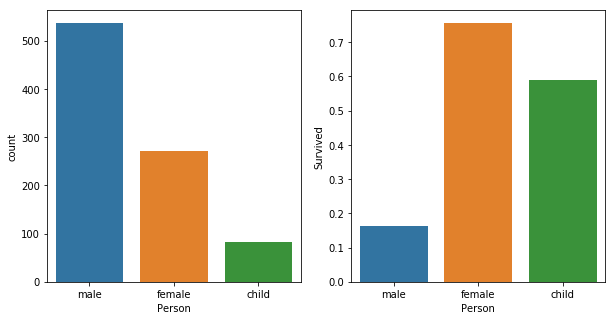

In [5]:

def get_person(x):
    return 'child' if x.Age < 16 else x.Sex
    
train_df['Person'] = train_df.apply(get_person,axis=1)
test_df['Person']    = test_df.apply(get_person,axis=1)
             
person_dummies_titanic = pd.get_dummies(train_df['Person'].values)
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'].values)
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

cols = person_dummies_titanic.columns
train_df[cols] = person_dummies_titanic
test_df[cols]    = person_dummies_test

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

seaborn.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
seaborn.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)


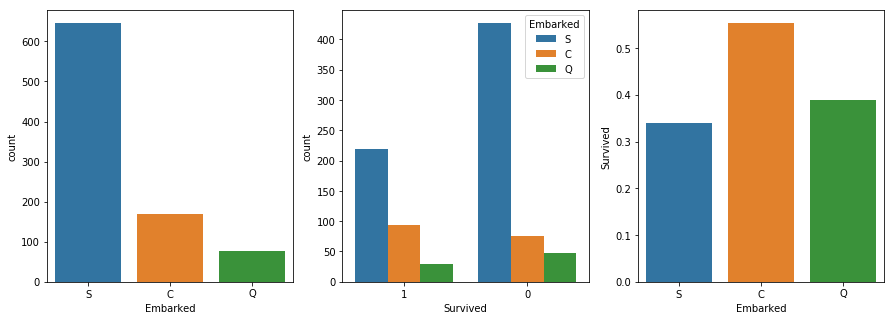

In [6]:
# Embarked get dummies

train_df["Embarked"] = train_df["Embarked"].fillna("S")

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

seaborn.countplot(x='Embarked', data=train_df, ax=axis1)
seaborn.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
seaborn.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

embark_dummies_train  = pd.get_dummies(train_df['Embarked'].values)
embark_dummies_test  = pd.get_dummies(test_df['Embarked'].values)

cols = embark_dummies_train.columns
train_df[cols] = embark_dummies_train
test_df[cols]  = embark_dummies_test

In [7]:
train_df["Survived"].value_counts()
train_df["Pclass"].value_counts()
train_df["Sex"].value_counts()
train_df["Embarked"].value_counts()

train_df["Age"] = train_df["Age"].fillna(np.mean(train_df["Age"]))
test_df["Age"] = test_df["Age"].fillna(np.mean(test_df["Age"]))

train_df = pd.get_dummies(train_df, prefix="G", columns=["Sex"])
test_df = pd.get_dummies(test_df, prefix="G", columns=["Sex"])

X = train_df.iloc[:, [2, 4, 5, 6, 11, 12]].values
y = train_df.iloc[:,1:2].values

X_test_df = test_df.iloc[:, [1, 3, 4, 5, 10, 11]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test_df = sc.transform(X_test_df)


classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

y_pred_lr = classifier_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
ac_lr = accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))


classifier_lr = LogisticRegression()
classifier_lr.fit(X,y)
prediction = classifier_lr.predict(X_test_df)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction 
    })
submission.to_csv("submission.csv", index=False)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.84      0.86      0.85       139
          1       0.76      0.74      0.75        84

avg / total       0.81      0.81      0.81       223

